In [2]:
from image_helpers import *
from global_vars import *
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data_dir = 'training/'
train_data_filename = data_dir + 'images/'
label_data_filename = data_dir + 'groundtruth/'

# Extract it into numpy arrays.
FILE_REGEX = "satImage_%.3d"

In [4]:
sat_images, label_images = read_images(train_data_filename, label_data_filename, 20, FILE_REGEX)
print("hello")

Loading training/images/satImage_001.png


Loading training/images/satImage_002.png
Loading training/images/satImage_003.png
Loading training/images/satImage_004.png
Loading training/images/satImage_005.png


Loading training/images/satImage_006.png
Loading training/images/satImage_007.png
Loading training/images/satImage_008.png
Loading training/images/satImage_009.png
Loading training/images/satImage_010.png
Loading training/images/satImage_011.png
Loading training/images/satImage_012.png


Loading training/images/satImage_013.png
Loading training/images/satImage_014.png
Loading training/images/satImage_015.png
Loading training/images/satImage_016.png
Loading training/images/satImage_017.png
Loading training/images/satImage_018.png
Loading training/images/satImage_019.png


Loading training/images/satImage_020.png
Loading training/groundtruth/satImage_001.png
Loading training/groundtruth/satImage_002.png
Loading training/groundtruth/satImage_003.png
Loading training/groundtruth/satImage_004.png
Loading training/groundtruth/satImage_005.png
Loading training/groundtruth/satImage_006.png
Loading training/groundtruth/satImage_007.png
Loading training/groundtruth/satImage_008.png
Loading training/groundtruth/satImage_009.png
Loading training/groundtruth/satImage_010.png
Loading training/groundtruth/satImage_011.png
Loading training/groundtruth/satImage_012.png
Loading training/groundtruth/satImage_013.png
Loading training/groundtruth/satImage_014.png
Loading training/groundtruth/satImage_015.png
Loading training/groundtruth/satImage_016.png
Loading training/groundtruth/satImage_017.png
Loading training/groundtruth/satImage_018.png
Loading training/groundtruth/satImage_019.png
Loading training/groundtruth/satImage_020.png
hello


[ 0.33333334  0.3019608   0.27058825]


done
[ 0.08333334  0.18823528  0.33333334]


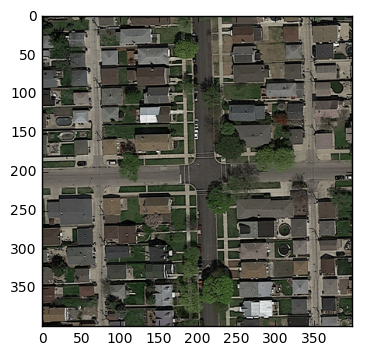

In [17]:
print(image[0,0])
hsv = tf.image.rgb_to_hsv(sat_images, name=None)
s = tf.Session()
out = s.run(hsv)
print("done")
print(out[0,0,0])

plt.imshow(image)
plt.show()

(20, 400, 400)


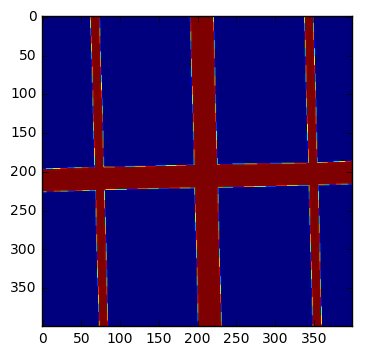

In [52]:
plt.imshow(label_images[0])
print(label_images.shape)
plt.show()

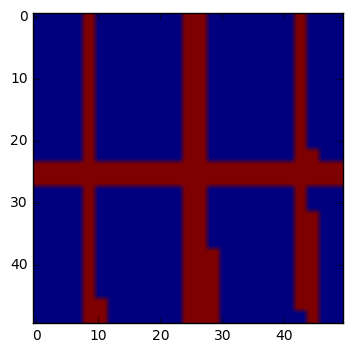

In [56]:
image = label_images[0]
hello = extract_labels([image], IMG_PATCH_SIZE)
tmp = hello[:, 0].reshape(int(image.shape[0] / IMG_PATCH_SIZE), int(image.shape[1] / IMG_PATCH_SIZE))
tmp = np.kron(tmp, np.ones((2, 2))).T

plt.imshow(tmp)
plt.show()

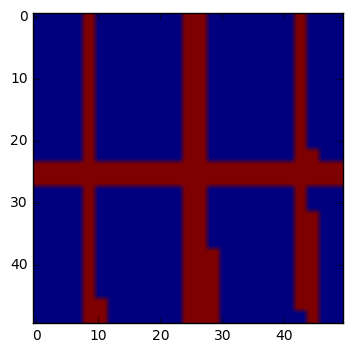

In [28]:
plt.imshow(ndimage.zoom(hello, 2, order=0))
plt.show()

In [7]:
patches_train_data = extract_data(train_data, border=IMG_BORDER)
patches_train_labels = extract_labels(train_labels)

patches_validation_data = extract_data(validation_data, border=IMG_BORDER)
patches_validation_labels = extract_labels(validation_labels)

patches_test_data = extract_data(test_data, border=IMG_BORDER)
patches_test_labels = extract_labels(test_labels)

In [8]:
print(patches_train_data.shape)
print(patches_train_labels.shape)
#plt.imshow(train_labels[0])
#plt.show()

(8750, 24, 24, 3)
(8750, 2)


In [15]:
idx0 = [i for i, j in enumerate(patches_train_labels) if j[0] == 1]
print(patches_train_labels[12])

[ 1.  0.]


In [21]:
c0 = 0
c1 = 0
for i in range(len(patches_train_labels)):
    if patches_train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1

# Make populations even.
min_c = min(c0, c1)
idx0 = [i for i, j in enumerate(patches_train_labels) if j[0] == 1]
idx1 = [i for i, j in enumerate(patches_train_labels) if j[1] == 1]
new_indices = idx0[0:min_c] + idx1[0:min_c]
tmp_data = patches_train_data[new_indices, :, :, :]
tmp_labels = patches_train_labels[new_indices, :]

In [23]:
tmp_labels.shape

(4040, 2)

In [39]:
patches_train_data, patches_train_labels = balance_data(patches_train_data, patches_train_labels)
patches_validation_data, vpatches_alidation_labels = balance_data(patches_validation_data, patches_validation_labels)
patches_test_data, patches_test_labels = balance_data(patches_test_data, patches_test_labels)

4344
(8750, 24, 24, 3)
1168
(2500, 24, 24, 3)
588
(1250, 24, 24, 3)
